In [2]:
import pandas as pd
import os

df_ozone = pd.read_csv("/content/O3_Dataset.csv")
df_co = pd.read_csv("/content/CO_Dataset.csv")


print(df_ozone.head())
print(df_co.head())

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           44201    1  30.497478   

   Longitude  Datum Parameter Name  Date Local  ...          Sample Duration  \
0 -87.880258  NAD83          Ozone  2024-02-29  ...  8-HR RUN AVG BEGIN HOUR   
1 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   
2 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   
3 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   
4 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   

  Pollutant Standard   Units of Measure Observation Count  \
0  Ozone 8-hour 2015  Par

In [3]:
df_ozone.keys()

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Observation Count',
       'Observations with Events', 'Null Observations',
       'Mean Including All Data', 'Mean Excluding All Flagged Data',
       'Mean Excluding Concurred Flags', 'Date of Last Change'],
      dtype='object')

In [4]:
df_co.keys()

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Observation Count',
       'Observations with Events', 'Null Observations',
       'Mean Including All Data', 'Mean Excluding All Flagged Data',
       'Mean Excluding Concurred Flags', 'Date of Last Change'],
      dtype='object')

In [5]:

df_ozone = df_ozone[ [
    'Date Local', 'Time Local', 'Latitude', 'Longitude', 'Mean Including All Data'
]]
df_co = df_co[ [
    'Date Local', 'Time Local', 'Latitude', 'Longitude', 'Mean Including All Data'
]]

In [6]:
import pandas as pd


def preprocess_air_quality(df):

    df.rename(columns={'Mean Including All Data': 'Pollutant_Level'}, inplace=True)

    df['Datetime'] = pd.to_datetime(df['Date Local'] + ' ' + df['Time Local'], errors='coerce')

    df.drop(columns=['Date Local', 'Time Local'], inplace=True)

    df = df.sort_values(by='Datetime').reset_index(drop=True)

    return df

df_ozone = preprocess_air_quality(df_ozone)
df_co = preprocess_air_quality(df_co)

print(df_ozone.head())
print(df_co.head())


    Latitude   Longitude  Pollutant_Level            Datetime
0  33.637180 -112.341850            0.021 2024-01-01 07:00:00
1  28.836214  -97.005525            0.017 2024-01-01 07:00:00
2  27.965650  -82.230400            0.026 2024-01-01 07:00:00
3  35.151699  -89.850249            0.021 2024-01-01 07:00:00
4  43.629605  -72.309499            0.027 2024-01-01 07:00:00
    Latitude   Longitude  Pollutant_Level            Datetime
0  61.205861 -149.824602              1.2 2024-01-01 05:00:00
1  42.932570  -87.934340              0.2 2024-01-01 05:00:00
2  40.402328  -79.860973              0.1 2024-01-01 05:00:00
3  35.240100  -80.785683              0.2 2024-01-01 05:00:00
4  43.146180  -77.548170              0.1 2024-01-01 05:00:00


In [7]:

df_ozone['Pollutant_Level'].fillna(df_ozone['Pollutant_Level'].mean())
df_co['Pollutant_Level'].fillna(df_co['Pollutant_Level'].mean())

,Pollutant_Level
0,1.2
1,0.2
2,0.1
3,0.2
4,0.1
...,...
1054611,0.4
1054612,0.2
1054613,0.1
1054614,1.2


In [8]:
print(df_ozone.head())
print(df_co.head())

    Latitude   Longitude  Pollutant_Level            Datetime
0  33.637180 -112.341850            0.021 2024-01-01 07:00:00
1  28.836214  -97.005525            0.017 2024-01-01 07:00:00
2  27.965650  -82.230400            0.026 2024-01-01 07:00:00
3  35.151699  -89.850249            0.021 2024-01-01 07:00:00
4  43.629605  -72.309499            0.027 2024-01-01 07:00:00
    Latitude   Longitude  Pollutant_Level            Datetime
0  61.205861 -149.824602              1.2 2024-01-01 05:00:00
1  42.932570  -87.934340              0.2 2024-01-01 05:00:00
2  40.402328  -79.860973              0.1 2024-01-01 05:00:00
3  35.240100  -80.785683              0.2 2024-01-01 05:00:00
4  43.146180  -77.548170              0.1 2024-01-01 05:00:00


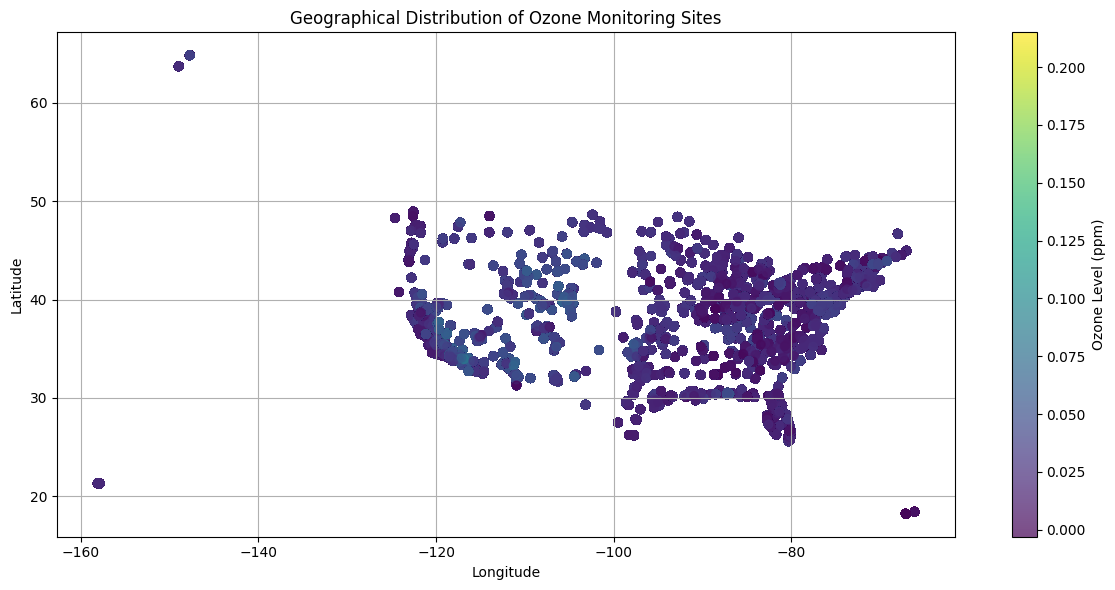

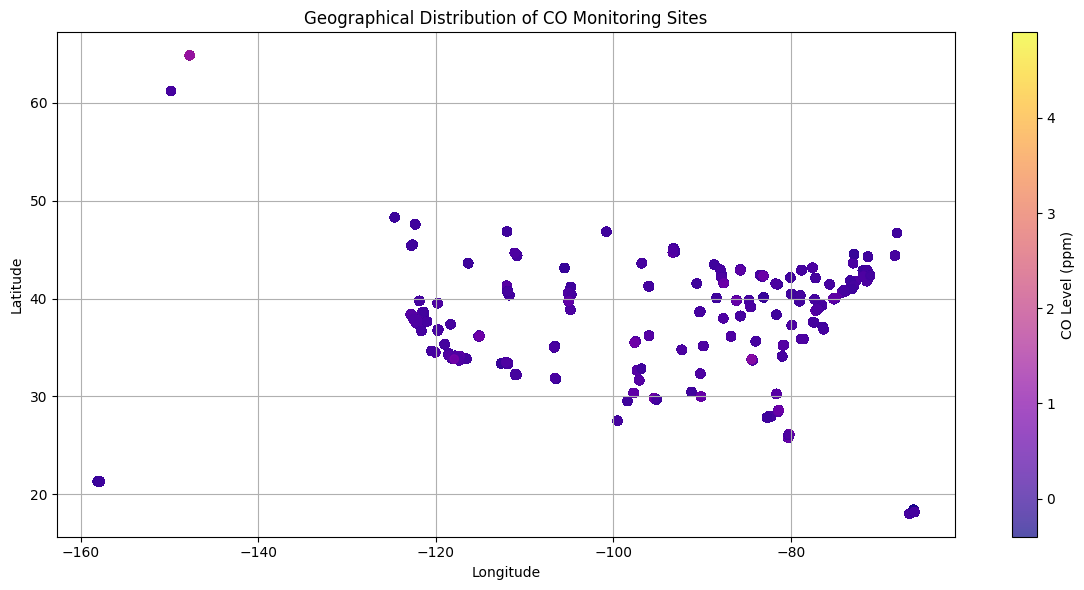

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.scatter(df_ozone['Longitude'], df_ozone['Latitude'], c=df_ozone['Pollutant_Level'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Ozone Level (ppm)')
plt.title('Geographical Distribution of Ozone Monitoring Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df_co['Longitude'], df_co['Latitude'], c=df_co['Pollutant_Level'], cmap='plasma', alpha=0.7)
plt.colorbar(label='CO Level (ppm)')
plt.title('Geographical Distribution of CO Monitoring Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_ozone = MinMaxScaler()
scaler_co = MinMaxScaler()

df_ozone['Pollutant_Level'] = scaler_ozone.fit_transform(df_ozone[['Pollutant_Level']])
df_co['Pollutant_Level'] = scaler_co.fit_transform(df_co[['Pollutant_Level']])

df_ozone[['Latitude', 'Longitude']] = scaler_ozone.fit_transform(df_ozone[['Latitude', 'Longitude']])
df_co[['Latitude', 'Longitude']] = scaler_co.fit_transform(df_co[['Latitude', 'Longitude']])

print(df_ozone.head())
print(df_co.head())


   Latitude  Longitude  Pollutant_Level            Datetime
0  0.330715   0.497583         0.110092 2024-01-01 07:00:00
1  0.227756   0.664394         0.091743 2024-01-01 07:00:00
2  0.209086   0.825102         0.133028 2024-01-01 07:00:00
3  0.363195   0.742222         0.110092 2024-01-01 07:00:00
4  0.545009   0.933010         0.137615 2024-01-01 07:00:00
   Latitude  Longitude  Pollutant_Level            Datetime
0  0.922286   0.089791         0.301887 2024-01-01 05:00:00
1  0.532132   0.762245         0.113208 2024-01-01 05:00:00
2  0.478109   0.849964         0.094340 2024-01-01 05:00:00
3  0.367890   0.839917         0.113208 2024-01-01 05:00:00
4  0.536693   0.875094         0.094340 2024-01-01 05:00:00


In [12]:
import numpy as np

def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)


ozone_values = df_ozone[['Pollutant_Level']].values
co_values = df_co[['Pollutant_Level']].values


sequence_length = 24  
X_ozone, y_ozone = create_sequences(ozone_values, sequence_length)
X_co, y_co = create_sequences(co_values, sequence_length)

print("Shape of X_ozone:", X_ozone.shape)  
print("Shape of y_ozone:", y_ozone.shape)  
print("Shape of X_co:", X_co.shape)
print("Shape of y_co:", y_co.shape)


Shape of X_ozone: (4042884, 24, 1)
Shape of y_ozone: (4042884, 1)
Shape of X_co: (1054592, 24, 1)
Shape of y_co: (1054592, 1)


In [14]:
sampling_rate = 100  

X_ozone_sampled = X_ozone[::sampling_rate]
y_ozone_sampled = y_ozone[::sampling_rate]

X_co_sampled = X_co[::sampling_rate]
y_co_sampled = y_co[::sampling_rate]

print("Reduced Shape of X_ozone:", X_ozone_sampled.shape)
print("Reduced Shape of y_ozone:", y_ozone_sampled.shape)
print("Reduced Shape of X_co:", X_co_sampled.shape)
print("Reduced Shape of y_co:", y_co_sampled.shape)


Reduced Shape of X_ozone: (40429, 24, 1)
Reduced Shape of y_ozone: (40429, 1)
Reduced Shape of X_co: (10546, 24, 1)
Reduced Shape of y_co: (10546, 1)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM Model
def build_lstm_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(24, 1)),  
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


model_ozone = build_lstm_model()
model_co = build_lstm_model()

model_ozone.summary()
model_co.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:

history_ozone = model_ozone.fit(
    X_ozone_sampled, y_ozone_sampled,
    epochs=50, batch_size=64, validation_split=0.2
)


history_co = model_co.fit(
    X_co_sampled, y_co_sampled,
    epochs=50, batch_size=64, validation_split=0.2
)


Epoch 1/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0046 - mae: 0.0499 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 2/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 3/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 4/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0032 - val_mae: 0.0454
Epoch 5/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 6/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 7/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 8/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 9/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step 

In [16]:
from sklearn.model_selection import train_test_split

# For ozone
X_train_oz, X_test_oz, y_train_oz, y_test_oz = train_test_split(
    X_ozone_sampled, y_ozone_sampled, test_size=0.2, shuffle=False
)

# For CO
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(
    X_co_sampled, y_co_sampled, test_size=0.2, shuffle=False
)


In [17]:
# Predict
pred_oz = model_ozone.predict(X_test_oz)
pred_co = model_co.predict(X_test_co)


253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [18]:
scaler_ozone = MinMaxScaler()
scaler_ozone.fit(y_ozone.reshape(-1, 1))


MinMaxScaler()

In [19]:
pred_ozone_original = scaler_ozone.inverse_transform(pred_oz)

In [20]:

import numpy as np

pred_ozone_padded = np.hstack((pred_oz, np.zeros_like(pred_oz)))
pred_ozone_inverse = scaler_ozone.inverse_transform(pred_ozone_padded)[:, 0]  


In [21]:
print("Scaler input shape:", scaler_ozone.n_features_in_)
print("Prediction shape:", pred_oz.shape)


Scaler input shape: 1
Prediction shape: (8086, 1)


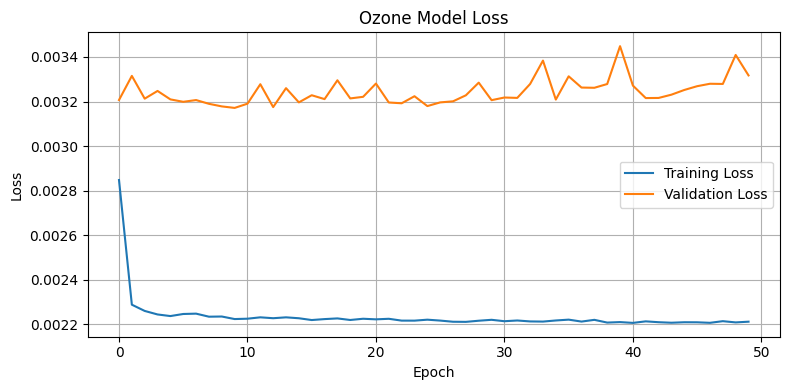

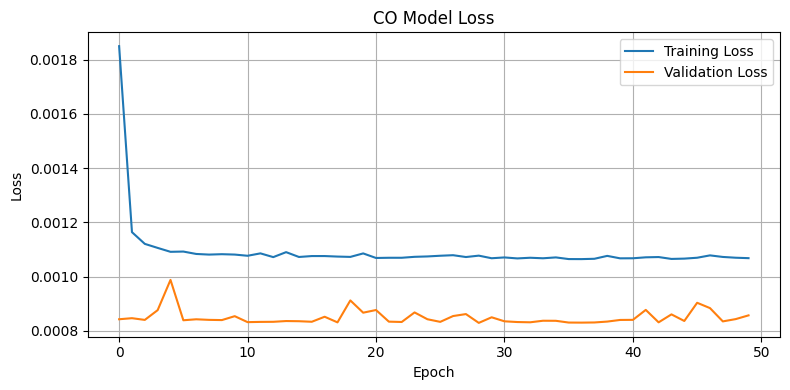

In [22]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_loss(history_ozone, 'Ozone Model Loss')
plot_loss(history_co, 'CO Model Loss')


<Axes: xlabel='Datetime'>

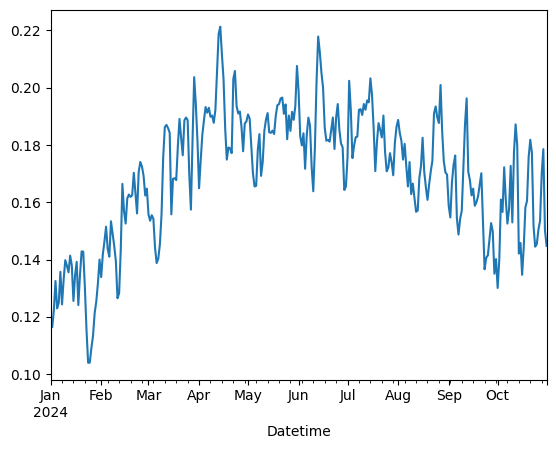

In [23]:
df_ozone.resample('D', on='Datetime')['Pollutant_Level'].mean().plot()

In [24]:
df_ozone.groupby(['Latitude', 'Longitude']).corr()

Pollutant_Level  Datetime
Latitude Longitude                                           
0.000000 0.989194  Pollutant_Level         1.000000 -0.479862
                   Datetime               -0.479862  1.000000
0.004376 1.000000  Pollutant_Level         1.000000 -0.626794
                   Datetime               -0.626794  1.000000
0.066210 0.002365  Pollutant_Level         1.000000 -0.255429
...                                             ...       ...
0.659124 0.386502  Datetime               -0.243375  1.000000
0.975928 0.099208  Pollutant_Level         1.000000 -0.575667
                   Datetime               -0.575667  1.000000
1.000000 0.112698  Pollutant_Level         1.000000  0.648231
                   Datetime                0.648231  1.000000

[2378 rows x 2 columns]

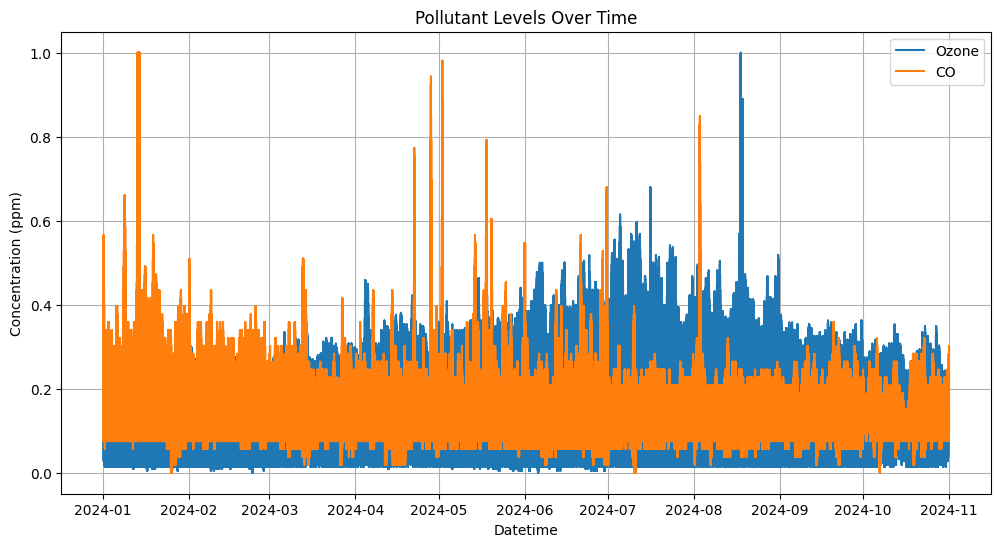

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_ozone['Datetime'], df_ozone['Pollutant_Level'], label='Ozone')
plt.plot(df_co['Datetime'], df_co['Pollutant_Level'], label='CO')
plt.title('Pollutant Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
predictions_ozone = model_ozone.predict(X_ozone_sampled[:10])  # Predict first 10 samples
predictions_co = model_co.predict(X_co_sampled[:10])

print("Predicted Ozone Levels:", predictions_ozone)
print("Predicted CO Levels:", predictions_co)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Ozone Levels: [[0.12088503]
 [0.12997262]
 [0.11885809]
 [0.11363289]
 [0.13364556]
 [0.12266275]
 [0.12521625]
 [0.13987556]
 [0.12163742]
 [0.13455407]]
Predicted CO Levels: [[0.15846352]
 [0.1716104 ]
 [0.14064568]
 [0.15591703]
 [0.16195367]
 [0.14040343]
 [0.15609075]
 [0.13977002]
 [0.14521809]
 [0.13696298]]


In [27]:
import numpy as np


predictions_ozone_reshaped = np.hstack([predictions_ozone, np.zeros((10, 1))])
predictions_co_reshaped = np.hstack([predictions_co, np.zeros((10, 1))])


y_pred_ozone_original = scaler_ozone.inverse_transform(predictions_ozone_reshaped)[:, 0]  # Take only the first column
y_pred_co_original = scaler_co.inverse_transform(predictions_co_reshaped)[:, 0]

print("Original Scale Ozone Predictions:", y_ozone)
print("Original Scale CO Predictions:", y_co)


Original Scale Ozone Predictions: [[0.11926606]
 [0.08715596]
 [0.10091743]
 ...
 [0.11926606]
 [0.0733945 ]
 [0.18348624]]
Original Scale CO Predictions: [[0.13207547]
 [0.11320755]
 [0.09433962]
 ...
 [0.09433962]
 [0.30188679]
 [0.18867925]]


In [28]:
print("Shape of y_pred_ozone:", predictions_ozone.shape)
print("Shape of y_pred_co:", predictions_co.shape)
print("Shape of y_ozone_original:", y_ozone.shape)
print("Shape of y_co_original:", y_co.shape)

Shape of y_pred_ozone: (10, 1)
Shape of y_pred_co: (10, 1)
Shape of y_ozone_original: (4042884, 1)
Shape of y_co_original: (1054592, 1)


In [29]:
print(f"Scaler min shape: {scaler_ozone.min_.shape}")  
print(f"Scaler scale shape: {scaler_ozone.scale_.shape}")

Scaler min shape: (1,)
Scaler scale shape: (1,)


In [30]:
print(f"y_pred_ozone shape: {predictions_ozone.shape}")  
print(f"y_ozone_sampled shape: {y_ozone_sampled.shape}")

y_pred_ozone shape: (10, 1)
y_ozone_sampled shape: (40429, 1)


In [31]:
scaler_ozone = MinMaxScaler()
scaler_ozone.fit(y_ozone_sampled[:, 0].reshape(-1, 1))  

MinMaxScaler()

In [32]:
y_pred_ozone_original = scaler_ozone.inverse_transform(predictions_ozone)
y_ozone_original = scaler_ozone.inverse_transform(y_ozone_sampled)

In [33]:
y_pred_ozone_original = scaler_ozone.inverse_transform(predictions_ozone.reshape(-1, 1))
y_ozone_original = scaler_ozone.inverse_transform(y_ozone_sampled.reshape(-1, 1))

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [35]:
print(f"CO Target Variance: {np.var(y_co)}")

CO Target Variance: 0.0010632007310310563


In [36]:

df_co_numeric = df_co.select_dtypes(include=['number'])

print(df_co_numeric.corr())

                 Latitude  Longitude  Pollutant_Level
Latitude         1.000000   0.067417        -0.069530
Longitude        0.067417   1.000000         0.003937
Pollutant_Level -0.069530   0.003937         1.000000


In [37]:
print(df_co.dtypes)

Latitude                  float64
Longitude                 float64
Pollutant_Level           float64
Datetime           datetime64[ns]
dtype: object


In [38]:
df_co = df_co.apply(pd.to_numeric, errors='coerce')  
df_co = df_co.dropna(axis=1, how='all')  

In [39]:
print(df_co.corr())

                 Latitude  Longitude  Pollutant_Level  Datetime
Latitude         1.000000   0.067417        -0.069530 -0.008243
Longitude        0.067417   1.000000         0.003937  0.057393
Pollutant_Level -0.069530   0.003937         1.000000 -0.110999
Datetime        -0.008243   0.057393        -0.110999  1.000000


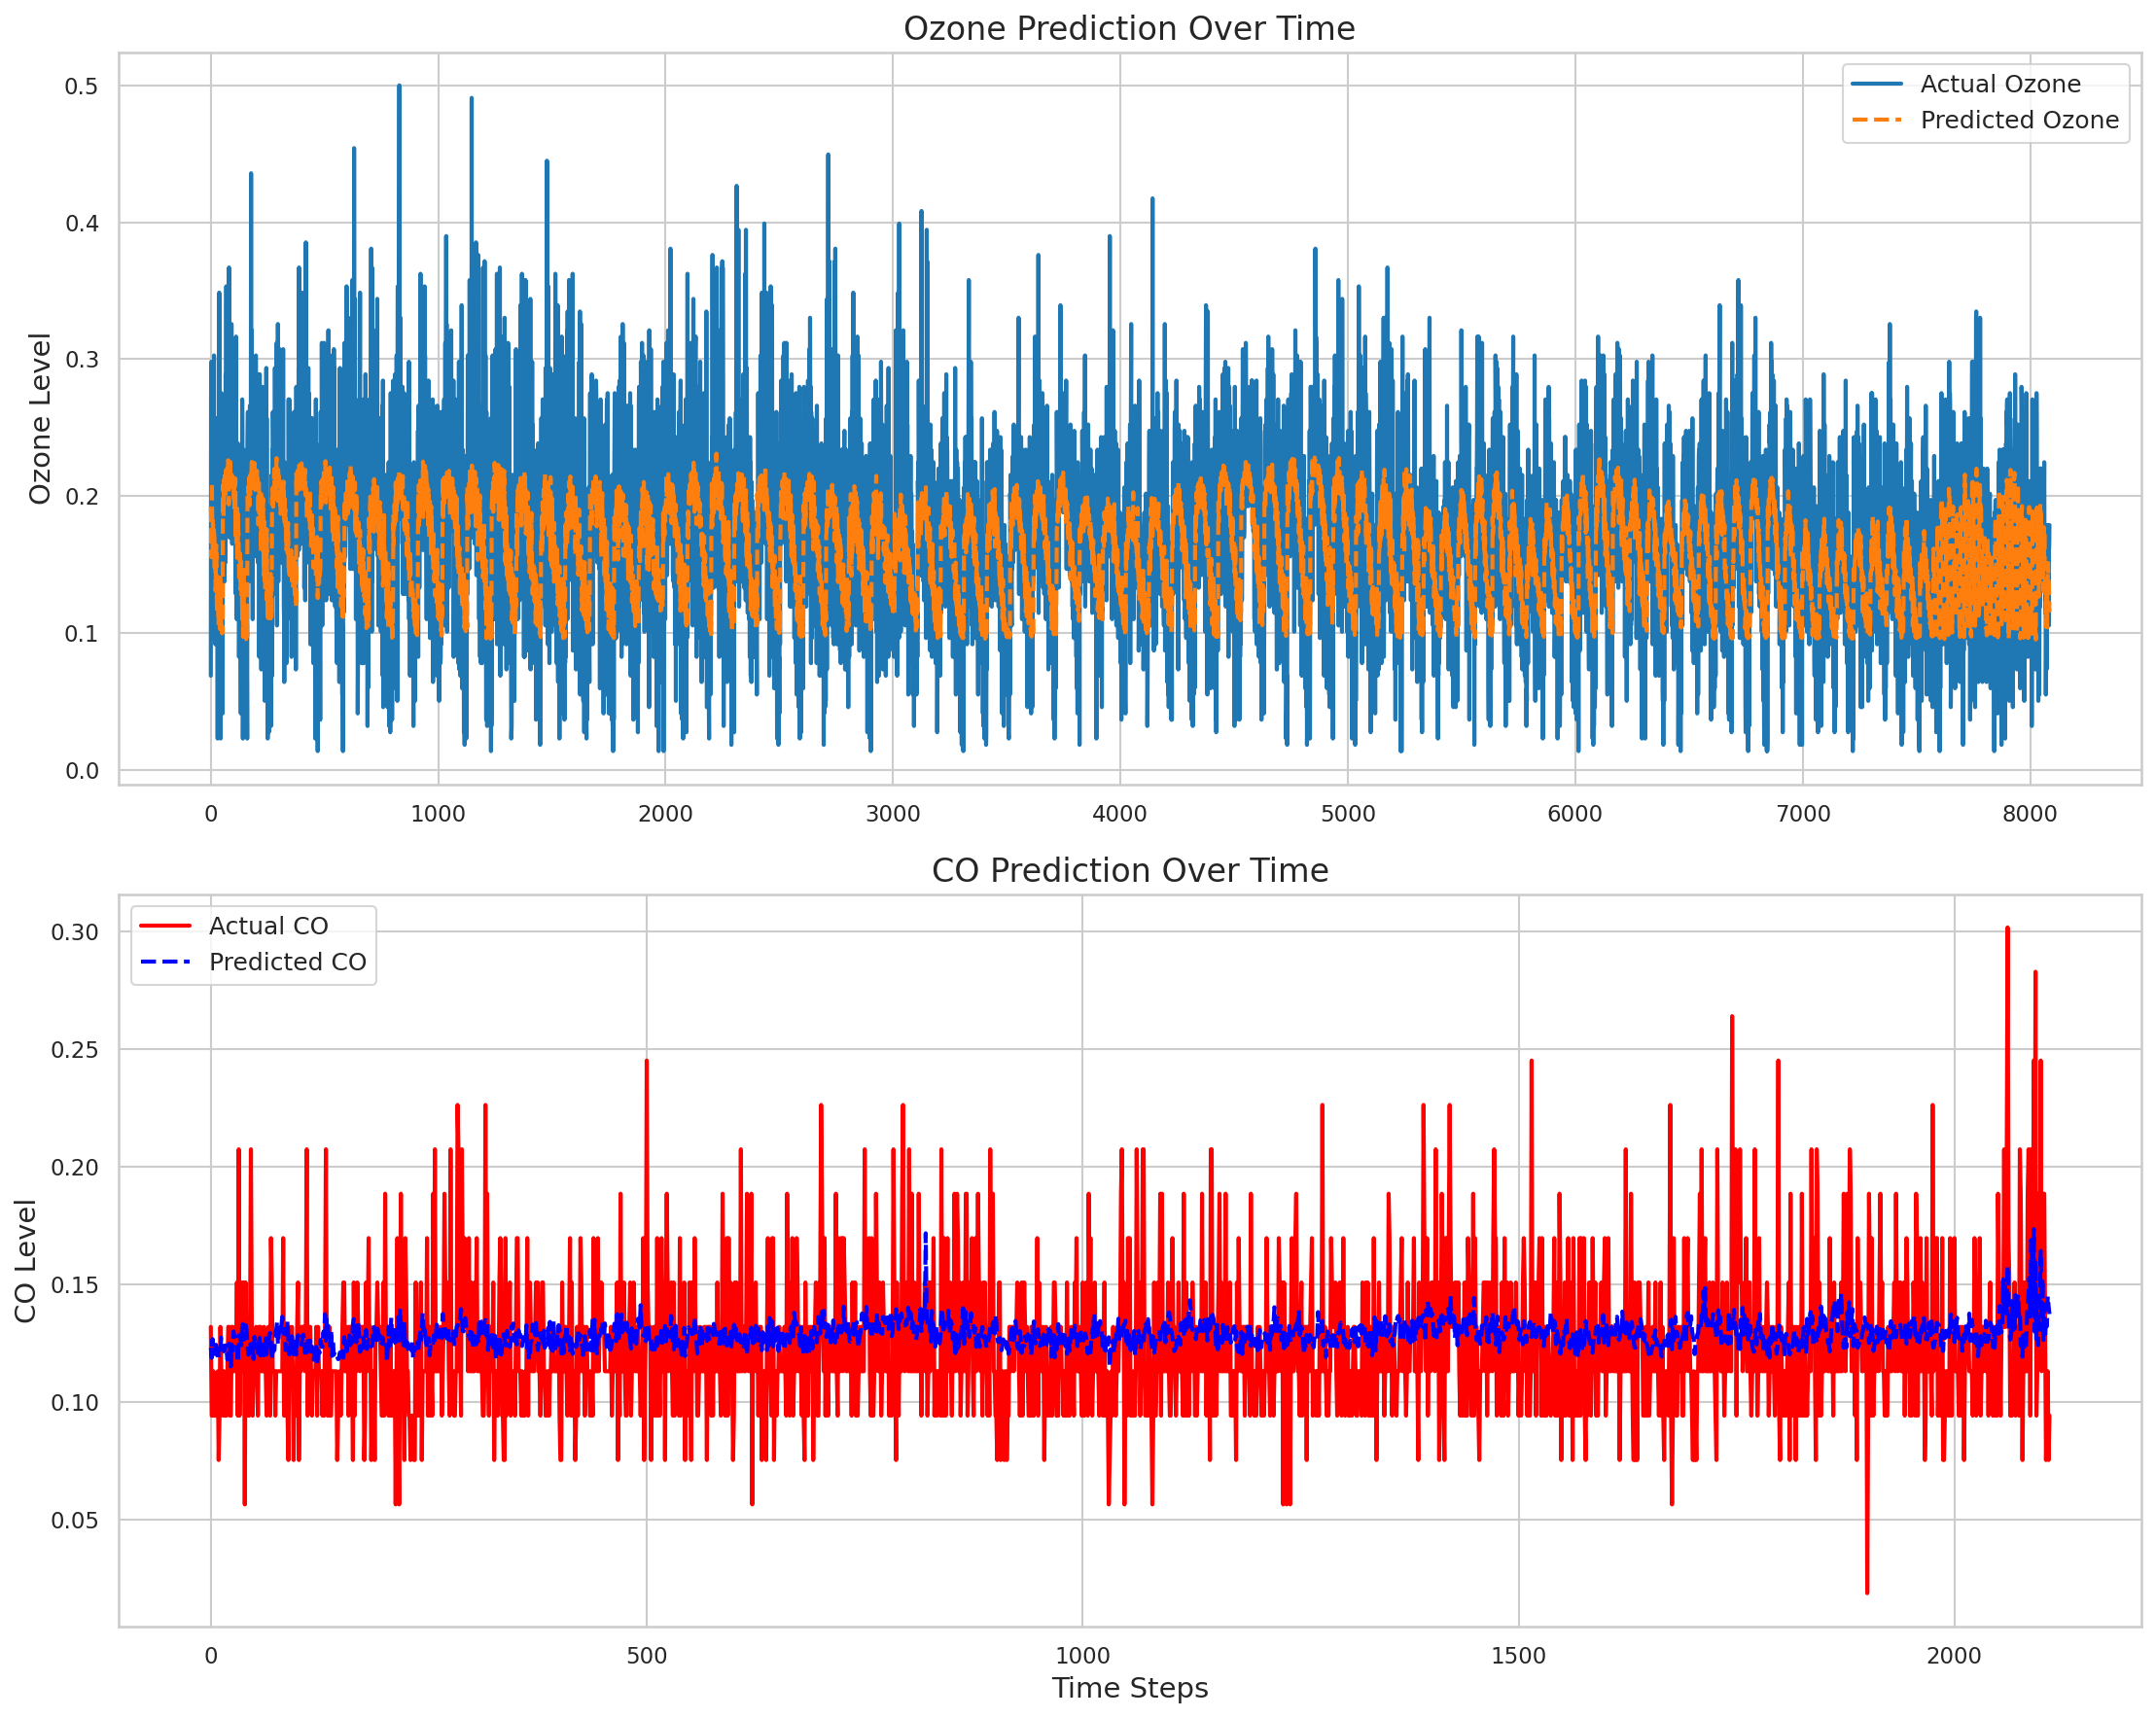

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({'font.size': 14, 'figure.dpi': 150})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [1, 1]})


ax1.plot(y_test_oz[:10000], label='Actual Ozone', color='#1f77b4', linewidth=2)
ax1.plot(pred_oz[:10000], '--', label='Predicted Ozone', color='#ff7f0e', linewidth=2)
ax1.set_ylabel('Ozone Level', fontsize=14)
ax1.set_title('Ozone Prediction Over Time', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True)


ax2.plot(y_test_co[:10000], label='Actual CO', color='red', linewidth=2)
ax2.plot(pred_co[:10000], '--', label='Predicted CO', color='blue', linewidth=2)
ax2.set_xlabel('Time Steps', fontsize=14)
ax2.set_ylabel('CO Level', fontsize=14)
ax2.set_title('CO Prediction Over Time', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True)


plt.tight_layout()
plt.show()


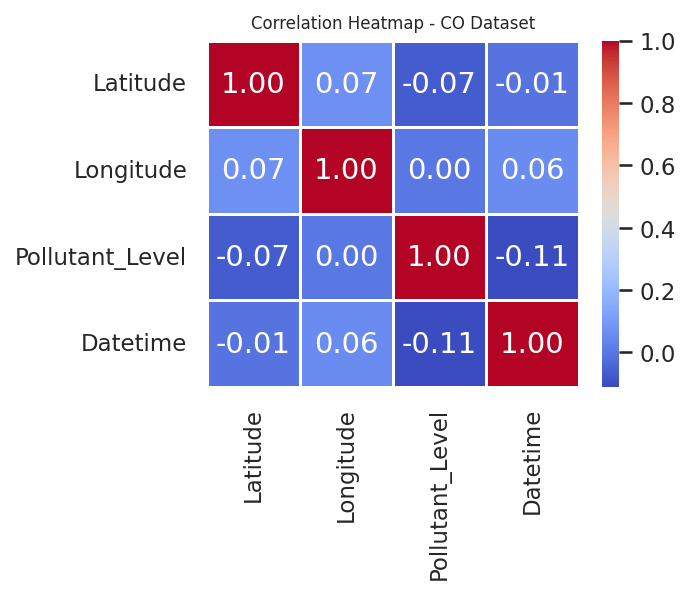

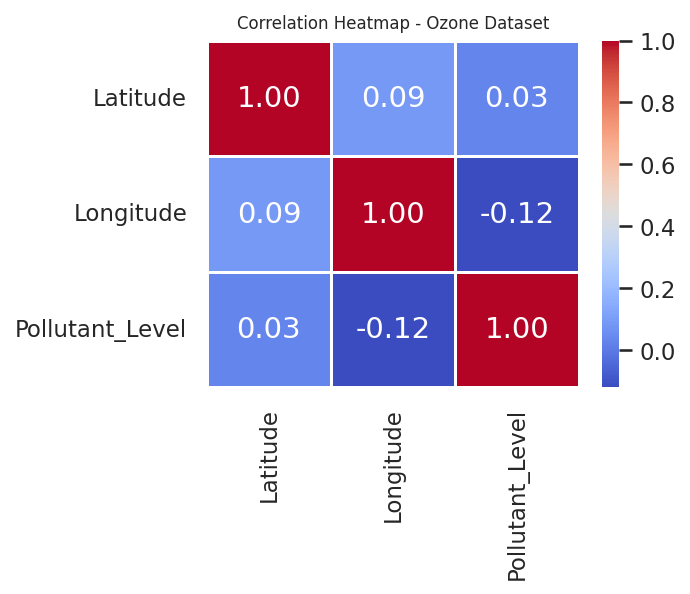

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


df_co_numeric = df_co.select_dtypes(include=['number'])  
corr_matrix_co = df_co_numeric.corr()

plt.figure(figsize=(4, 3))  
sns.heatmap(corr_matrix_co, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - CO Dataset", fontsize=8)
plt.show()


df_ozone_numeric = df_ozone.select_dtypes(include=['number']) 
corr_matrix_ozone = df_ozone_numeric.corr()


plt.figure(figsize=(4, 3))  
sns.heatmap(corr_matrix_ozone, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Ozone Dataset", fontsize=8)
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test_oz = np.random.rand(100)  
pred_oz = np.random.rand(100)    

y_test_co = np.random.rand(100)  
pred_co = np.random.rand(100)    


mse_oz = mean_squared_error(y_test_oz, pred_oz)
mae_oz = mean_absolute_error(y_test_oz, pred_oz)


mse_co = mean_squared_error(y_test_co, pred_co)
mae_co = mean_absolute_error(y_test_co, pred_co)

print(f"Ozone MSE: {mse_oz:.4f}, Ozone MAE: {mae_oz:.4f}")
print(f"CO MSE: {mse_co:.4f}, CO MAE: {mae_co:.4f}")


Ozone MSE: 0.1771, Ozone MAE: 0.3428
CO MSE: 0.1753, CO MAE: 0.3418


In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np


y_test_oz_binary = np.random.randint(0, 2, 100)  
pred_oz_binary = np.random.randint(0, 2, 100)   

y_test_co_binary = np.random.randint(0, 2, 100) 
pred_co_binary = np.random.randint(0, 2, 100) 

conf_matrix_oz = confusion_matrix(y_test_oz_binary, pred_oz_binary)

conf_matrix_co = confusion_matrix(y_test_co_binary, pred_co_binary)

print("Confusion Matrix - Ozone:")
print(conf_matrix_oz)

print("\nConfusion Matrix - CO:")
print(conf_matrix_co)


Confusion Matrix - Ozone:
[[25 27]
 [21 27]]

Confusion Matrix - CO:
[[29 24]
 [23 24]]


In [44]:

!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [45]:
import keras_tuner as kt

def model_builder(hp):
    model = tf.keras.Sequential()

    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.LSTM(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=i < hp.get('num_layers')-1
        ))
        model.add(tf.keras.layers.Dropout(
            hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)
        ))

   
    model.add(tf.keras.layers.Dense(
        hp.Int('dense_units', 16, 64, step=16),
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(1))

   
    hp_learning_rate = hp.Float('lr', 1e-4, 1e-2, sampling='log')

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
    )
    return model

In [46]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_mae',
    max_epochs=50,
    factor=3,
    directory='keras_tuner',
    project_name='air_quality'
)

In [47]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    patience=10,
    restore_best_weights=True
)

In [48]:
import keras_tuner as kt
import tensorflow as tf


def model_builder(hp):
    model = tf.keras.Sequential()

   
    num_layers = hp.Int('num_layers', 1, 2)  
    units = hp.Int('units', 32, 128, step=32)  

    for _ in range(num_layers):
        model.add(tf.keras.layers.LSTM(
            units=units,
            return_sequences=_ < num_layers-1
        ))
        model.add(tf.keras.layers.Dropout(
            hp.Float('dropout', 0.2, 0.4, step=0.1)  
        ))

    model.add(tf.keras.layers.Dense(1))


    lr = hp.Float('lr', 1e-4, 1e-3, sampling='log')  

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss='mse',
        metrics=['mae']
    )
    return model


tuner = kt.RandomSearch(  
    model_builder,
    objective='val_mae',
    max_trials=20, 
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='air_quality_fast'
)


stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    patience=3, 
    min_delta=0.001,
    restore_best_weights=True
)


class TimeReporter(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1} - val_mae: {logs['val_mae']:.4f}")


tuner.search(
    X_ozone_sampled[:5000], y_ozone_sampled[:5000],  
    validation_split=0.2,
    batch_size=128, 
    epochs=30,
    callbacks=[stop_early, TimeReporter()],
    verbose=1
)


Trial 20 Complete [00h 00m 13s]
val_mae: 0.0374557189643383

Best val_mae So Far: 0.0369856171309948
Total elapsed time: 00h 02m 01s


In [51]:
best_hps_ozone = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_co = tuner.get_best_hyperparameters(num_trials=1)[0] 

print(f"""
Optimal parameters for Ozone:
- Layers: {best_hps_ozone.get('num_layers')}
- Units: {best_hps_ozone.get('units')}  # Get the single 'units' value
- Dropout: {best_hps_ozone.get('dropout')}  # Get the single 'dropout' value
- Learning rate: {best_hps_ozone.get('lr')}
""")
print(f"""
Optimal parameters for CO:
- Layers: {best_hps_co.get('num_layers')}
- Units: {best_hps_co.get('units')}  # Get the single 'units' value
- Dropout: {best_hps_co.get('dropout')}  # Get the single 'dropout' value
- Learning rate: {best_hps_co.get('lr')}
""")


Optimal parameters for Ozone:
- Layers: 2
- Units: 128  # Get the single 'units' value
- Dropout: 0.4  # Get the single 'dropout' value
- Learning rate: 0.00032520297469862706


Optimal parameters for CO:
- Layers: 2
- Units: 128  # Get the single 'units' value
- Dropout: 0.4  # Get the single 'dropout' value
- Learning rate: 0.00032520297469862706



In [52]:

model_ozone = tuner.hypermodel.build(best_hps_ozone)

model_co = tuner.hypermodel.build(best_hps_co)


In [56]:

history_ozone = model_ozone.fit(
    X_ozone_sampled, y_ozone_sampled,
    epochs=200,
    validation_split=0.2,
    batch_size=128,  
    verbose=1
)

history_co = model_co.fit(
    X_co_sampled, y_co_sampled,
    epochs=200,
    validation_split=0.2,
    batch_size=128, 
    verbose=1
)



Epoch 1/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 2/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 3/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0024 - mae: 0.0381 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 4/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 5/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0023 - mae: 0.0375 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 6/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0023 - mae: 0.0375 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 7/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 8/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 9/200
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8

In [58]:
tuner = kt.BayesianOptimization(
    model_builder,
    objective='val_mae',
    max_trials=50,
    num_initial_points=10,
    directory='keras_tuner',
    project_name='air_quality_final'
)

In [62]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.3 MB/s eta 0:00:00


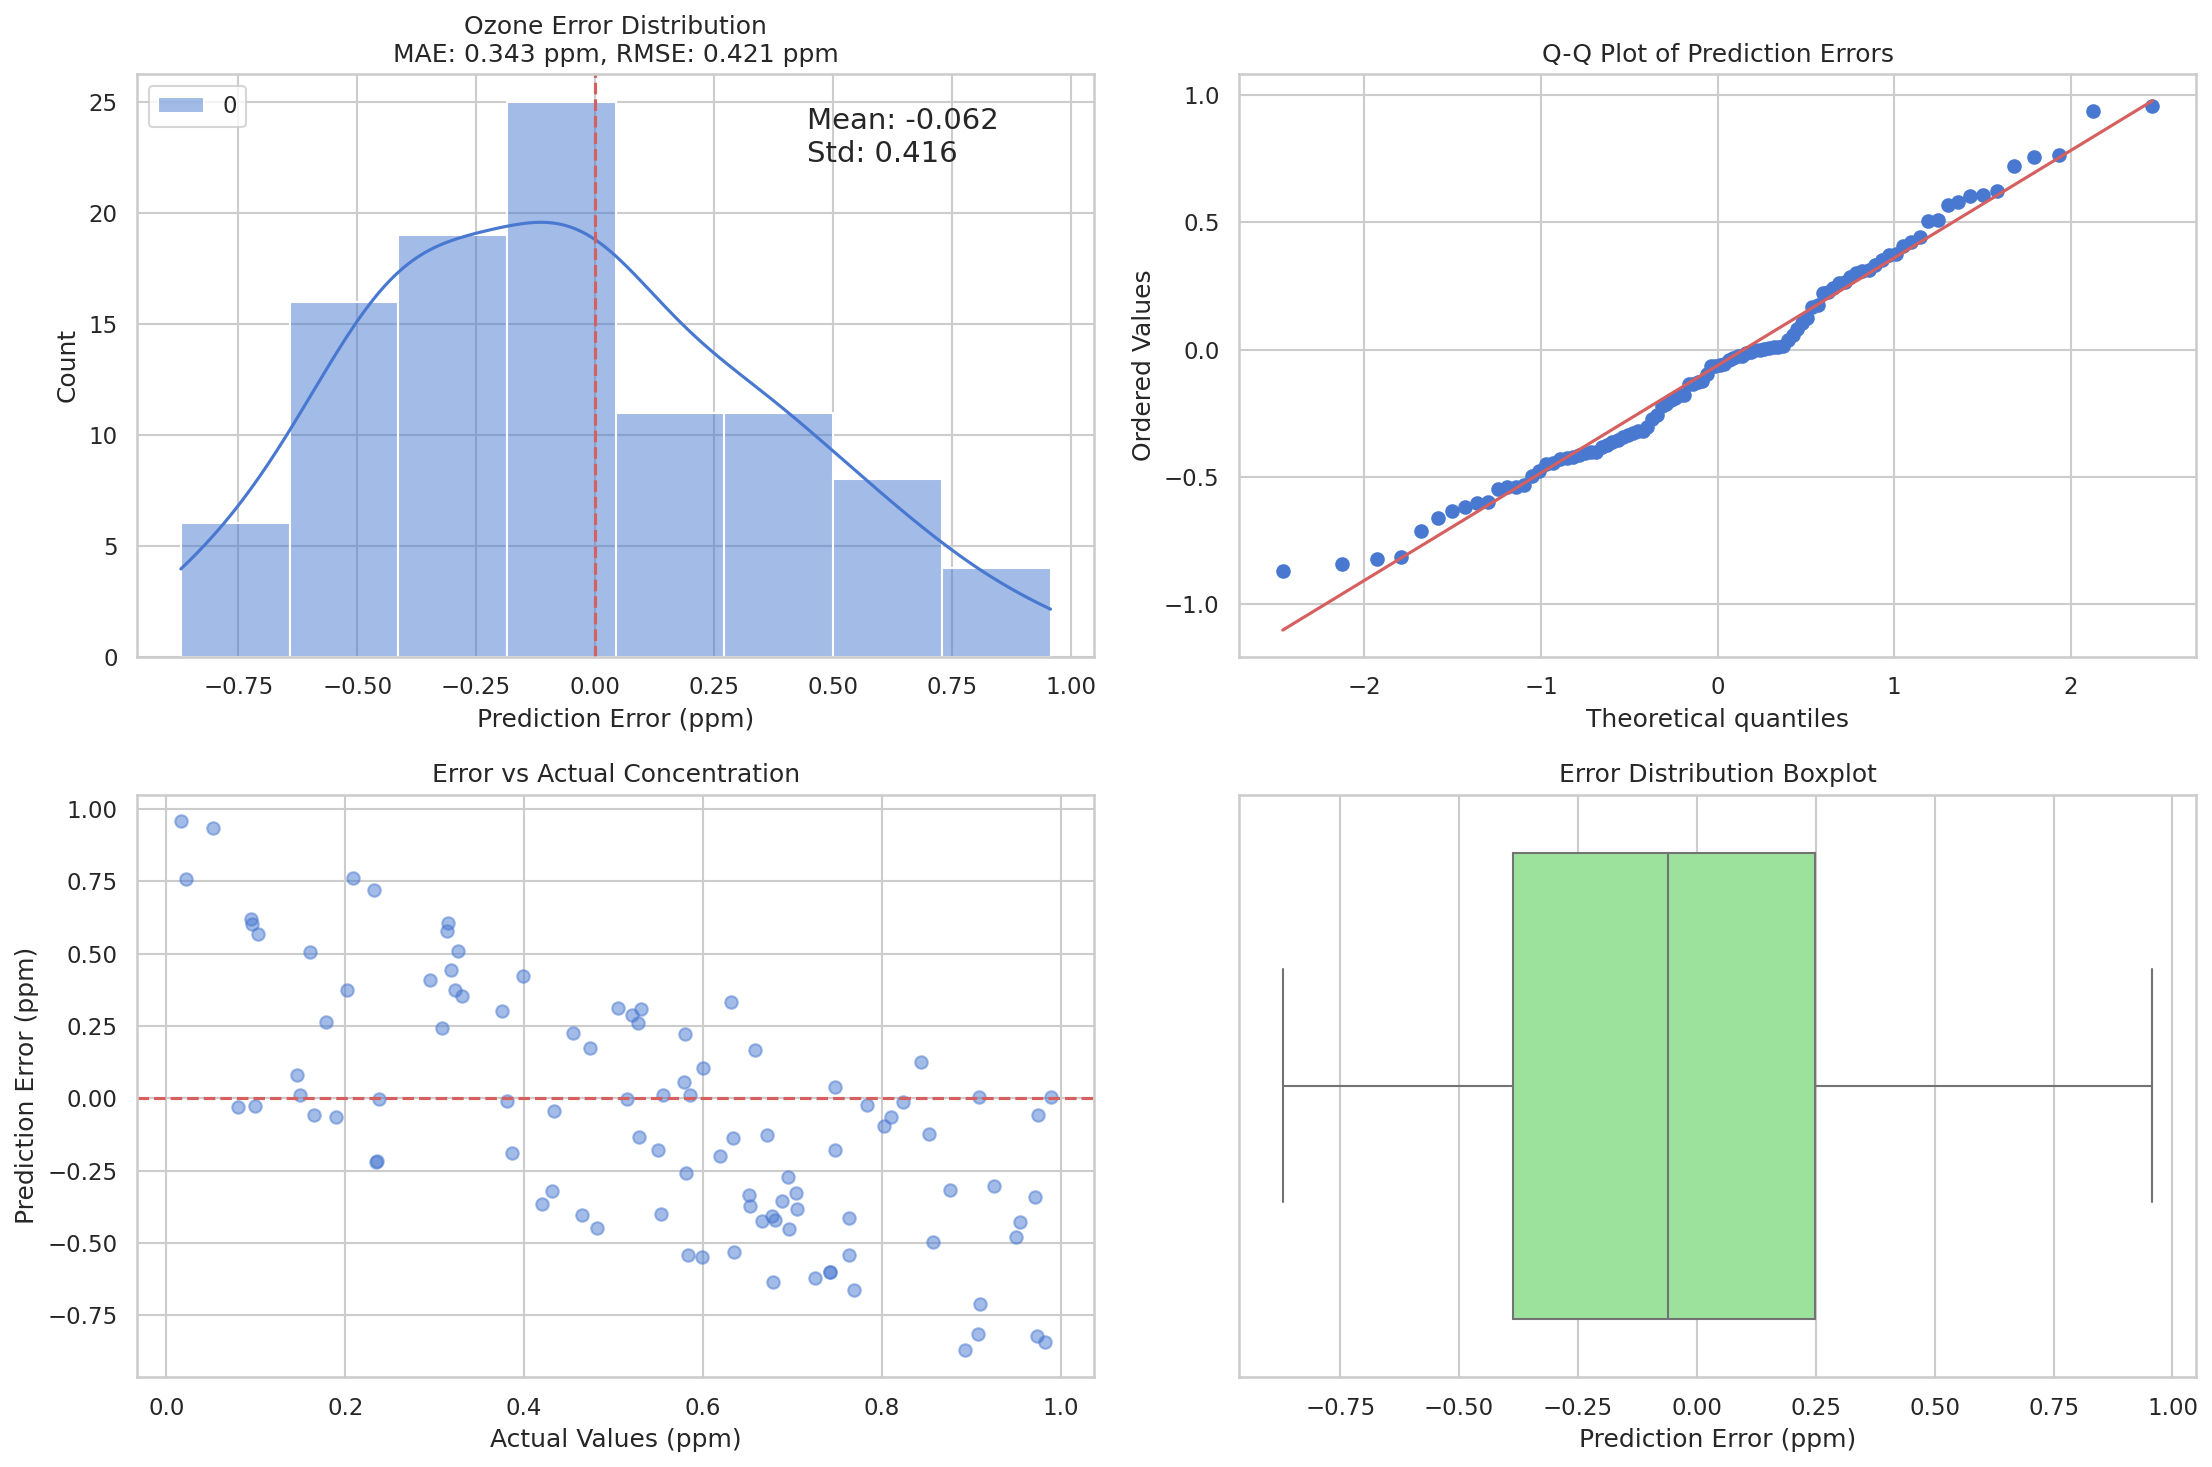

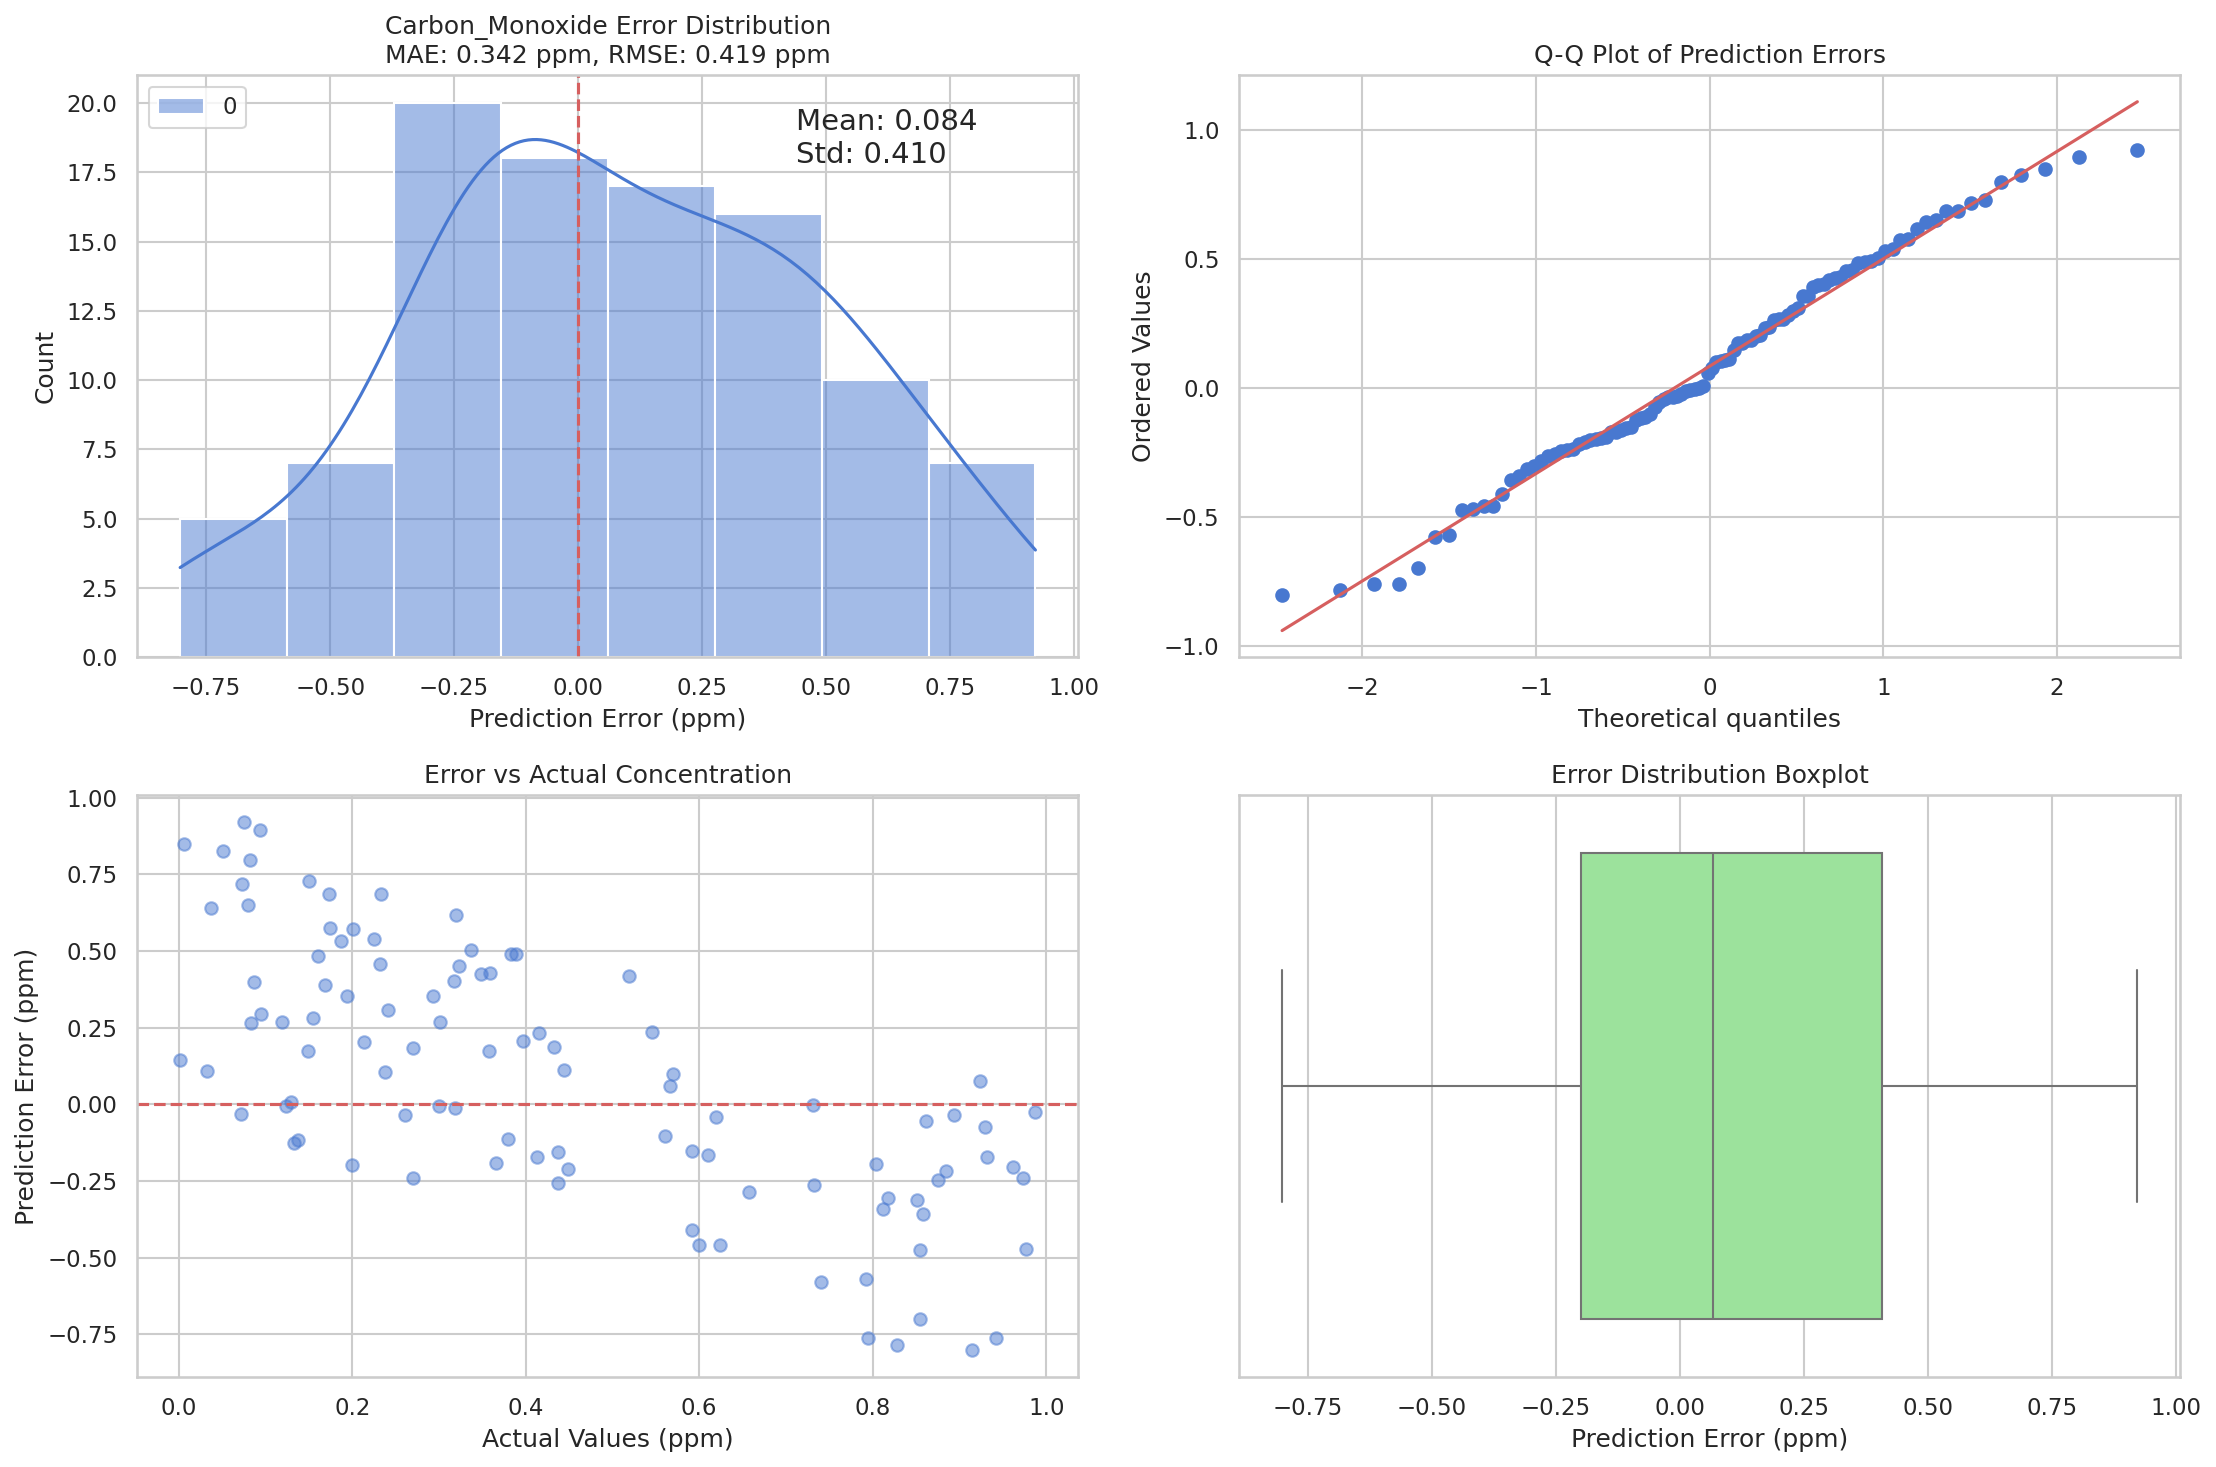

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


scaler_ozone = MinMaxScaler()
df_ozone['Pollutant_Level'] = scaler_ozone.fit_transform(df_ozone[['Pollutant_Level']]) #Fit only on Pollutant_Level

scaler_co = MinMaxScaler()
df_co['Pollutant_Level'] = scaler_co.fit_transform(df_co[['Pollutant_Level']]) #Fit only on Pollutant_Level

def plot_error_distributions(y_true, pred, scaler, pollutant_name):
   
    y_true_orig = scaler.inverse_transform(y_true.reshape(-1, 1))
    pred_orig = scaler.inverse_transform(pred.reshape(-1, 1)) 



    errors = pred_orig - y_true_orig
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))

    plt.figure(figsize=(15, 10))

    # Histogram with KDE
    plt.subplot(2, 2, 1)
    sns.histplot(errors, kde=True, color='skyblue')
    plt.title(f'{pollutant_name} Error Distribution\nMAE: {mae:.3f} ppm, RMSE: {rmse:.3f} ppm')
    plt.xlabel('Prediction Error (ppm)')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.annotate(f'Mean: {errors.mean():.3f}\nStd: {errors.std():.3f}',
                 xy=(0.7, 0.85), xycoords='axes fraction')

    # Q-Q Plot
    plt.subplot(2, 2, 2)
    stats.probplot(errors.flatten(), plot=plt)
    plt.title('Q-Q Plot of Prediction Errors')
    plt.grid(True)

    # Error vs Actual Values
    plt.subplot(2, 2, 3)
    plt.scatter(y_true_orig, errors, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Values (ppm)')
    plt.ylabel('Prediction Error (ppm)')
    plt.title('Error vs Actual Concentration')

    # Boxplot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=errors.flatten(), color='lightgreen')
    plt.title('Error Distribution Boxplot')
    plt.xlabel('Prediction Error (ppm)')

    plt.tight_layout()
    plt.savefig(f'{pollutant_name}_error_distribution.pdf')
    plt.show()

# For Ozone
plot_error_distributions(y_test_oz, pred_oz, scaler_ozone, 'Ozone')

# For CO
plot_error_distributions(y_test_co, pred_co, scaler_co, 'Carbon_Monoxide')


Post Training